<a href="https://colab.research.google.com/github/MakkiFourati/RecSys-Thesis/blob/main/Category__Rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df_f = pd.read_csv('drive/MyDrive/Thesis/data/Category_Rec.csv')

In [ ]:
df_f.isna().any()

customer_id         False
price               False
sales_channel_id    False
FN                   True
Active               True
                    ...  
Underwear bottom    False
Unknown             False
Vest top            False
Wedge               False
next_purchase       False
Length: 73, dtype: bool

In [ ]:
print('Number of Null values:')
print('FN: ' + str(df_f[df_f['FN'].isna()].shape[0]))
print('Active: ' + str(df_f[df_f['Active'].isna()].shape[0]))
print('club_member_status: ' + str(df_f[df_f['club_member_status'].isna()].shape[0]))
print('fashion_news_frequency : ' + str(df_f[df_f['fashion_news_frequency'].isna()].shape[0]))
print('age : ' + str(df_f[df_f['age'].isna()].shape[0]))

Number of Null values:
FN: 208465
Active: 210756
club_member_status: 536
fashion_news_frequency : 1274
age : 1299


In [ ]:
df_f.groupby('club_member_status').count()['customer_id']

club_member_status
ACTIVE        360878
LEFT CLUB         93
PRE-CREATE      4392
Name: customer_id, dtype: int64

In [ ]:
df_f.groupby('fashion_news_frequency').count()['customer_id']

fashion_news_frequency
Monthly         118
NONE         206713
Regularly    157794
Name: customer_id, dtype: int64

In [ ]:
df_f.dropna(subset=['fashion_news_frequency'],inplace=True)
df_f.reset_index(drop=True,inplace=True)

In [ ]:
df_f.describe()

,price,sales_channel_id,FN,Active,age,postal_code,number_purchases,Bag,Ballerinas,Belt,...,Swimwear bottom,T-shirt,Top,Trousers,Underwear Tights,Underwear body,Underwear bottom,Unknown,Vest top,Wedge
count,364625.000000,364625.000000,157434.0,155143.0,363405.000000,364625.000000,364625.000000,364625.000000,364625.000000,364625.000000,...,364625.000000,364625.000000,364625.000000,364625.000000,364625.000000,364625.000000,364625.000000,364625.000000,364625.000000,364625.000000
mean,0.027295,1.629257,1.0,1.0,35.800969,84269.323796,64.858715,0.452237,0.100352,0.410378,...,2.185124,4.487835,3.323952,8.630667,0.398300,0.171489,2.137522,0.193607,2.949441,0.082951
std,0.007604,0.483004,0.0,0.0,12.941848,57520.278030,55.537737,1.075263,0.562402,1.005284,...,3.825883,5.779164,4.332307,10.577330,1.418136,0.733586,3.640197,0.668178,4.322686,0.447429
min,0.002577,1.000000,1.0,1.0,16.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022339,1.000000,1.0,1.0,25.000000,33830.000000,32.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.026417,2.000000,1.0,1.0,31.000000,76859.000000,47.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,2.000000,6.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,0.031201,2.000000,1.0,1.0,47.000000,130247.000000,75.000000,1.000000,0.000000,0.000000,...,3.000000,6.000000,4.000000,11.000000,0.000000,0.000000,3.000000,0.000000,4.000000,0.000000
max,0.151196,2.000000,1.0,1.0,99.000000,203087.000000,1888.000000,77.000000,116.000000,58.000000,...,161.000000,654.000000,171.000000,277.000000,79.000000,45.000000,122.000000,35.000000,117.000000,42.000000


In [ ]:
#df_f['FN'] = df_f['FN'].fillna(0)
df_f['Active'] = df_f['Active'].fillna(0)

In [ ]:
df_f.drop(columns=['FN'],inplace=True)

In [ ]:
df_f.groupby('Active').count()

,customer_id,price,sales_channel_id,club_member_status,fashion_news_frequency,age,postal_code,number_purchases,Bag,Ballerinas,...,T-shirt,Top,Trousers,Underwear Tights,Underwear body,Underwear bottom,Unknown,Vest top,Wedge,next_purchase
Active,,,,,,,,,,,,,,,,,,,,,
0.0,209482,209482,209482,209075,209482,208541,209482,209482,209482,209482,...,209482,209482,209482,209482,209482,209482,209482,209482,209482,209482
1.0,155143,155143,155143,155087,155143,154864,155143,155143,155143,155143,...,155143,155143,155143,155143,155143,155143,155143,155143,155143,155143


In [ ]:
df_f.groupby('fashion_news_frequency').count()

,customer_id,price,sales_channel_id,Active,club_member_status,age,postal_code,number_purchases,Bag,Ballerinas,...,T-shirt,Top,Trousers,Underwear Tights,Underwear body,Underwear bottom,Unknown,Vest top,Wedge,next_purchase
fashion_news_frequency,,,,,,,,,,,,,,,,,,,,,
Monthly,118,118,118,118,118,118,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118
NONE,206713,206713,206713,206713,206308,205780,206713,206713,206713,206713,...,206713,206713,206713,206713,206713,206713,206713,206713,206713,206713
Regularly,157794,157794,157794,157794,157736,157507,157794,157794,157794,157794,...,157794,157794,157794,157794,157794,157794,157794,157794,157794,157794


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df_f[['fashion_news_frequency']])
encoder.categories_

[array(['Monthly', 'NONE', 'Regularly'], dtype=object)]

In [ ]:
dummy = encoder.transform(df_f[['fashion_news_frequency']]).toarray()
df_f = pd.concat([df_f,pd.DataFrame(dummy,columns=encoder.categories_[0])],axis=1)

In [ ]:
df_f = df_f.drop(columns=['customer_id','club_member_status','fashion_news_frequency'])

In [ ]:
df_f.describe()['age']

count    363405.000000
mean         35.800969
std          12.941848
min          16.000000
25%          25.000000
50%          31.000000
75%          47.000000
max          99.000000
Name: age, dtype: float64

In [ ]:
df_f['age'] = df_f['age'].fillna(31)

In [ ]:
df_f.groupby('next_purchase').size()

next_purchase
Bag                 1803
Ballerinas           226
Belt                1683
Bikini top          4706
Blazer              5497
                    ... 
Underwear body      2792
Underwear bottom    7882
Unknown             1321
Vest top            6912
Wedge                265
Length: 62, dtype: int64

In [ ]:
df_f

,price,sales_channel_id,Active,age,postal_code,number_purchases,Bag,Ballerinas,Belt,Bikini top,...,Underwear Tights,Underwear body,Underwear bottom,Unknown,Vest top,Wedge,next_purchase,Monthly,NONE,Regularly
0,0.030292,2,1.0,30.0,0,125,0,0,1,3,...,0,3,2,0,4,0,Trousers,0.0,0.0,1.0
1,0.031628,2,1.0,37.0,1,339,4,0,0,0,...,0,1,122,9,27,0,Bra,0.0,0.0,1.0
2,0.030927,1,1.0,27.0,2,108,1,0,1,1,...,0,1,15,0,13,0,Underwear bottom,0.0,0.0,1.0
3,0.021859,1,0.0,26.0,3,24,0,0,0,1,...,0,1,0,0,4,0,Trousers,0.0,1.0,0.0
4,0.028808,1,1.0,33.0,4,87,0,0,0,7,...,0,1,6,0,2,1,Dress,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364620,0.034859,2,0.0,32.0,82216,24,0,0,0,0,...,0,0,0,0,0,0,Robe,0.0,1.0,0.0
364621,0.026102,2,0.0,60.0,178701,29,0,0,0,0,...,29,0,0,0,0,0,Underwear Tights,0.0,1.0,0.0
364622,0.025169,2,0.0,30.0,14241,77,0,0,0,0,...,0,0,0,0,0,0,Sneakers,0.0,1.0,0.0
364623,0.021628,2,0.0,24.0,203087,42,0,0,0,0,...,0,0,0,0,0,0,Sarong,0.0,1.0,0.0


# 1 Model

In [ ]:
X = df_f.drop(columns=['next_purchase'])
y = df_f.loc[:,'next_purchase']
column_names = list(X)
y

0                 Trousers
1                      Bra
2         Underwear bottom
3                 Trousers
4                    Dress
                ...       
364620                Robe
364621    Underwear Tights
364622            Sneakers
364623              Sarong
364624          Cap/peaked
Name: next_purchase, Length: 364625, dtype: object

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
selector_m=SelectKBest(mutual_info_classif, k=35)

X_m = pd.DataFrame(selector_m.fit_transform(X, y), columns=X.columns[selector_m.get_support()])


In [ ]:
print(X.columns[selector_m.get_support()])

Index(['sales_channel_id', 'age', 'postal_code', 'number_purchases',
       'Bikini top', 'Blazer', 'Blouse', 'Boots', 'Bra', 'Cardigan', 'Coat',
       'Dress', 'Earring', 'Flip flop', 'Hoodie', 'Jacket', 'Leggings/Tights',
       'Necklace', 'Pyjama set', 'Ring', 'Shirt', 'Shorts', 'Skirt', 'Socks',
       'Sweater', 'Swimsuit', 'Swimwear bottom', 'T-shirt', 'Top', 'Trousers',
       'Underwear Tights', 'Underwear body', 'Underwear bottom', 'Unknown',
       'Vest top'],
      dtype='object')


In [ ]:
for i in range(len(selector_m.scores_)):
    print('Feature %i %s: %f' % (i, X.columns[i], selector_m.scores_[i]))

Feature 0 price: 0.000000
Feature 1 sales_channel_id: 0.005683
Feature 2 Active: 0.001809
Feature 3 age: 0.011031
Feature 4 postal_code: 0.063468
Feature 5 number_purchases: 0.003507
Feature 6 Bag: 0.002382
Feature 7 Ballerinas: 0.002142
Feature 8 Belt: 0.001672
Feature 9 Bikini top: 0.039370
Feature 10 Blazer: 0.008045
Feature 11 Blouse: 0.020894
Feature 12 Bodysuit: 0.002245
Feature 13 Boots: 0.004843
Feature 14 Bra: 0.029228
Feature 15 Cap/peaked: 0.002729
Feature 16 Cardigan: 0.011306
Feature 17 Coat: 0.005766
Feature 18 Dress: 0.021523
Feature 19 Dungarees: 0.002260
Feature 20 Earring: 0.005377
Feature 21 Flat shoe: 0.000747
Feature 22 Flip flop: 0.000000
Feature 23 Garment Set: 0.000140
Feature 24 Gloves: 0.000000
Feature 25 Hair clip: 0.000000
Feature 26 Hair string: 0.000994
Feature 27 Hair ties: 0.002073
Feature 28 Hair/alice band: 0.003121
Feature 29 Hat/beanie: 0.000000
Feature 30 Hat/brim: 0.000000
Feature 31 Heeled sandals: 0.000000
Feature 32 Hoodie: 0.006672
Feature 33 J

In [ ]:
X_m.shape

(364625, 35)

In [ ]:
X=X_m
column_names = list(X)

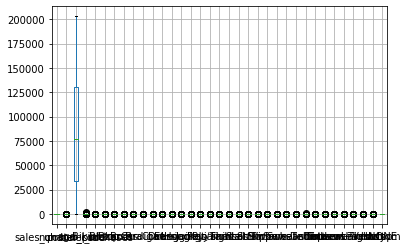

In [ ]:
%matplotlib inline
X.boxplot()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X) 
print(scaler)

StandardScaler()


In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
X_scaled.shape

(364625, 71)

In [ ]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = column_names

X_scaled.head()

,price,sales_channel_id,Active,age,postal_code,number_purchases,Bag,Ballerinas,Belt,Bikini top,...,Trousers,Underwear Tights,Underwear body,Underwear bottom,Unknown,Vest top,Wedge,Monthly,NONE,Regularly
0,0.394148,0.767577,1.162003,-0.447639,-1.465039,1.082892,-0.420584,-0.178436,0.586524,0.191499,...,1.263963,-0.280862,3.855736,-0.037779,-0.289754,0.243034,-0.185395,-0.017992,-1.144133,1.144887
1,0.569841,0.767577,1.162003,0.094025,-1.465021,4.936133,3.299443,-0.178436,-0.408221,-0.575389,...,0.791253,-0.280862,1.129400,32.927512,13.179737,5.563807,-0.185395,-0.017992,-1.144133,1.144887
2,0.477612,-1.302801,1.162003,-0.679781,-1.465004,0.776793,0.509423,-0.178436,0.586524,-0.319760,...,0.413085,-0.280862,1.129400,3.533461,-0.289754,2.325076,-0.185395,-0.017992,-1.144133,1.144887
3,-0.714842,-1.302801,-0.860583,-0.757162,-1.464987,-0.735694,-0.420584,-0.178436,-0.408221,-0.319760,...,-0.815960,-0.280862,1.129400,-0.587200,-0.289754,0.243034,-0.185395,-0.017992,0.874025,-0.873449
4,0.199029,-1.302801,1.162003,-0.215498,-1.464969,0.398672,-0.420584,-0.178436,-0.408221,1.214017,...,-0.059624,-0.280862,1.129400,1.061064,-0.289754,-0.219642,2.049600,-0.017992,-1.144133,1.144887


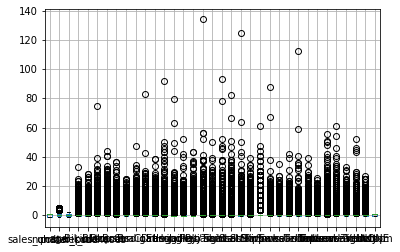

In [ ]:
X_scaled.boxplot()

In [ ]:
#PCA fit
from sklearn.decomposition import PCA
# we can choose the number of components e.g. 10, the percentage of the total variance or set it to None (that means it automatically chooses the number of components)
pca = PCA()
pca.fit(X_scaled) #The fit learns some quantities from the data, most importantly the "components" and "explained variance"

PCA()

In [ ]:
#let's use the pca to transform the dataset
X_pca = pd.DataFrame(pca.transform(X_scaled))
X_pca

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,3.800400,-1.573208,1.154825,0.145557,0.032665,1.503384,-2.686029,-0.776725,-2.545340,0.164064,...,-0.967427,-1.185347,-0.194827,-1.342937,-0.929854,-0.928889,-0.110192,0.013030,9.795592e-17,-1.071021e-15
1,18.524146,1.493456,12.273958,0.177126,-17.957279,34.072885,3.528329,-9.315349,12.199004,11.400477,...,2.518923,4.640264,-1.229381,16.652674,-1.902182,2.903505,-0.540913,-0.019537,-1.788766e-14,-7.621337e-15
2,2.373336,-1.262364,3.119064,1.152372,-1.629386,1.411374,-0.900915,0.948689,0.088532,-1.217517,...,0.349154,0.009721,-0.529056,0.989672,-0.328969,0.311126,0.695957,0.019637,-1.456356e-15,-1.959200e-15
3,-1.962103,1.486798,0.266567,0.406575,0.101588,-0.134156,-0.643425,-0.360966,-0.646996,-0.662541,...,0.625180,0.138204,0.090338,0.092919,-0.267314,-0.107218,0.007297,0.011533,2.547428e-16,-6.470240e-17
4,2.289804,-1.851104,0.046457,1.357383,3.903131,1.384717,0.125947,0.024324,-0.110347,-2.072420,...,1.484498,-0.054356,0.658178,0.667548,-0.083291,0.885135,0.001422,0.026112,-9.012448e-16,-1.293066e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364620,-0.037554,2.293633,3.549953,3.699803,0.472154,12.437617,-1.474493,-8.863135,-0.889252,8.864157,...,-0.118144,-0.170190,-0.919033,0.637753,0.200066,0.480327,0.102468,0.021043,6.860570e-15,-1.549680e-14
364621,-2.293384,1.445939,-0.455056,2.401134,-2.186041,1.995324,0.301512,0.356092,-3.145052,-3.040761,...,0.639309,0.570255,-0.031959,-1.043218,0.090927,-0.154751,-0.012155,0.005987,-3.908594e-15,2.599833e-15
364622,5.400074,0.177504,-11.577898,4.772678,7.763729,5.896741,9.216799,16.958925,4.382835,4.025940,...,0.099567,-1.602995,2.969536,0.541618,0.962453,-2.878770,-0.169025,0.015634,-3.353482e-15,-6.781552e-15
364623,2.803187,3.031992,8.984822,0.992722,12.088170,-2.851198,17.470259,-22.002479,3.329834,-1.514448,...,0.116093,-4.510075,0.219306,-0.426040,-1.157409,1.601977,-0.393604,0.028326,7.082614e-15,1.570046e-14


In [ ]:
#Let's analyse what happened
#VISUALIZE The amount of variance explained by each of the 10 selected principal components.
pd.DataFrame(pca.explained_variance_).transpose()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,9.029015,3.004763,2.371303,2.11093,1.93817,1.599448,1.405846,1.345237,1.283671,1.235199,...,0.53871,0.514474,0.45575,0.430731,0.423438,0.420394,0.145333,0.021824,1.758980e-30,7.916436e-32


In [ ]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca.explained_variance_ratio_).transpose()
explained_var

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,0.127169,0.04232,0.033399,0.029731,0.027298,0.022527,0.019801,0.018947,0.01808,0.017397,...,0.007587,0.007246,0.006419,0.006067,0.005964,0.005921,0.002047,0.000307,2.477430e-32,1.114988e-33


In [ ]:
#VISUALIZE The cumulative percentage of explained variance
import numpy as np
cum_explained_var=np.cumsum(pca.explained_variance_ratio_)
pd.DataFrame(cum_explained_var).transpose()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,0.127169,0.169489,0.202888,0.232619,0.259917,0.282445,0.302245,0.321192,0.339272,0.356669,...,0.966029,0.973275,0.979694,0.985761,0.991725,0.997646,0.999693,1.0,1.0,1.0


In [ ]:
type(explained_var)

pandas.core.frame.DataFrame

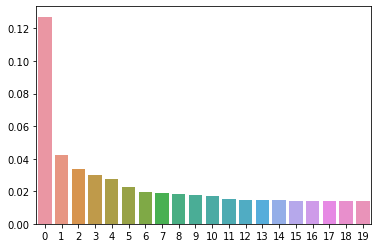

In [ ]:
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_var.iloc[:,:20])

In [ ]:
pd.DataFrame(pca.components_,index=['PC' + str(i) for i in range(71)],columns=X.columns)

,price,sales_channel_id,Active,age,postal_code,number_purchases,Bag,Ballerinas,Belt,Bikini top,...,Trousers,Underwear Tights,Underwear body,Underwear bottom,Unknown,Vest top,Wedge,Monthly,NONE,Regularly
PC0,1.379826e-04,4.527692e-02,2.583284e-02,2.163599e-03,-7.855736e-02,0.325465,0.150768,0.069104,0.116851,0.118866,...,0.223325,0.051846,0.080606,0.116064,0.072312,0.181589,0.081850,-0.003102,-0.025434,0.025549
PC1,1.156573e-03,3.785444e-02,-5.587634e-01,-6.380144e-02,-3.582643e-02,0.019101,-0.014882,-0.023332,0.000941,0.091313,...,-0.015639,0.016841,0.035983,0.063928,0.029616,0.049456,-0.014811,-0.007500,0.561918,-0.561695
PC2,-1.226670e-03,-1.367982e-02,1.287337e-01,-1.795634e-01,-1.599234e-01,0.024631,-0.074037,-0.149870,0.010172,0.380621,...,-0.115346,0.040929,0.153194,0.249034,0.105479,0.129064,-0.085017,0.002522,-0.129575,0.129494
PC3,-7.193593e-04,-1.646351e-01,-8.890680e-03,-1.246778e-01,-8.394440e-02,-0.100137,0.203147,0.105648,0.127685,-0.080916,...,-0.181714,0.137882,0.055722,0.088271,-0.018274,-0.109383,0.079200,0.003303,0.007114,-0.007234
PC4,1.657725e-03,1.941748e-01,1.692854e-02,-1.090701e-01,1.659981e-02,-0.032758,0.068011,0.163567,-0.017400,0.260365,...,-0.064411,-0.122906,0.051480,-0.119245,-0.069125,-0.054881,0.183615,-0.005387,-0.017229,0.017426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC66,-1.982067e-03,-1.206997e-02,1.729039e-03,2.418391e-03,-2.170189e-02,-0.060590,-0.001972,-0.003822,-0.005360,0.011554,...,0.147358,-0.004644,-0.000817,0.068948,0.003066,-0.134338,0.004342,-0.000574,-0.002553,0.002574
PC67,-1.249752e-03,2.553610e-03,-2.685390e-04,-6.732855e-03,8.675738e-04,-0.004050,0.001927,0.001802,0.000946,-0.704791,...,-0.013127,-0.001144,-0.000888,-0.025027,-0.000925,0.005971,-0.000542,-0.000043,-0.000526,0.000527
PC68,-2.995638e-04,-1.479189e-03,8.179535e-01,-4.218100e-03,4.880657e-04,-0.000295,0.000122,0.000389,-0.000149,-0.000807,...,-0.000899,0.000286,0.000100,-0.000248,0.000004,-0.000638,-0.000126,-0.013918,0.406885,-0.406415
PC69,1.684088e-18,2.812285e-18,2.787986e-16,-2.702780e-16,1.104966e-16,0.677591,-0.013119,-0.006862,-0.012265,-0.047728,...,-0.129049,-0.017302,-0.008950,-0.044412,-0.008152,-0.052739,-0.005459,0.017464,0.481110,0.481068


In [ ]:
X_pca.iloc[:,:1]

,0
0,3.800400
1,18.524146
2,2.373336
3,-1.962103
4,2.289804
...,...
364620,-0.037554
364621,-2.293384
364622,5.400074
364623,2.803187


In [ ]:
from sklearn.model_selection import train_test_split

#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y , random_state= 30) 
#X_pca.iloc[:,:1]
print(X_train.shape)

(273468, 71)


## 1-1 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#Create KNN Classifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':[25,35,45,55],
              #'metric':['manhattan']
              'weights': ['uniform', 'distance']
              }

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1_weighted', verbose=90, n_jobs=-1)

In [ ]:
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.088425 using {'n_neighbors': 25, 'weights': 'uniform'}
0.088425 (0.000287) with: {'n_neighbors': 25, 'weights': 'uniform'}
0.082688 (0.000840) with: {'n_neighbors': 25, 'weights': 'distance'}
0.087234 (0.000436) with: {'n_neighbors': 35, 'weights': 'uniform'}
0.083069 (0.000724) with: {'n_neighbors': 35, 'weights': 'distance'}
0.085856 (0.000531) with: {'n_neighbors': 45, 'weights': 'uniform'}
0.083484 (0.000833) with: {'n_neighbors': 45, 'weights': 'distance'}
0.085021 (0.000477) with: {'n_neighbors': 55, 'weights': 'uniform'}
0.083821 (0.000850) with: {'n_neighbors': 55, 'weights': 'distance'}


In [ ]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

In [ ]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train, average='weighted'))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='weighted'))

***RESULTS ON TRAIN SET***
f1_score:  0.15599784125988153
--
***RESULTS ON TEST SET***
f1_score:  0.08777293107443389


## 1-2 Neural Net

In [ ]:
# load packages
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df_f.drop(columns=['next_purchase'])
y = df_f.loc[:,'next_purchase']
column_names = list(X)
y

0                 Trousers
1                      Bra
2         Underwear bottom
3                 Trousers
4                    Dress
                ...       
364620                Robe
364621    Underwear Tights
364622            Sneakers
364623              Sarong
364624          Cap/peaked
Name: next_purchase, Length: 364625, dtype: object

In [ ]:
le = LabelEncoder()
le.fit(y)
le.classes_

array(['Bag', 'Ballerinas', 'Belt', 'Bikini top', 'Blazer', 'Blouse',
       'Bodysuit', 'Boots', 'Bra', 'Cap/peaked', 'Cardigan', 'Coat',
       'Dress', 'Dungarees', 'Earring', 'Flat shoe', 'Flip flop',
       'Garment Set', 'Gloves', 'Hair clip', 'Hair string', 'Hair ties',
       'Hair/alice band', 'Hat/beanie', 'Hat/brim', 'Heeled sandals',
       'Hoodie', 'Jacket', 'Jumpsuit/Playsuit', 'Leggings/Tights',
       'Necklace', 'Night gown', 'Other accessories', 'Other shoe',
       'Polo shirt', 'Pumps', 'Pyjama bottom', 'Pyjama set', 'Ring',
       'Robe', 'Sandals', 'Sarong', 'Scarf', 'Shirt', 'Shorts', 'Skirt',
       'Slippers', 'Sneakers', 'Socks', 'Sunglasses', 'Sweater',
       'Swimsuit', 'Swimwear bottom', 'T-shirt', 'Top', 'Trousers',
       'Underwear Tights', 'Underwear body', 'Underwear bottom',
       'Unknown', 'Vest top', 'Wedge'], dtype=object)

In [ ]:
y_enc=le.transform(y)
y_enc

array([55,  8, 58, ..., 47, 41,  9])

In [ ]:
NB_CLASS = max(y_enc) + 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, stratify=y , random_state= 30) 

print(X_train.shape)

(273468, 71)


In [ ]:
y_test.shape

(91157,)

In [ ]:
model = Sequential()
model.add(Dense(units=100, activation=tf.keras.activations.relu))
model.add(Dense(units=500, activation=tf.keras.activations.relu))
model.add(Dense(units=500, activation=tf.keras.activations.relu))
model.add(Dense(units=100, activation=tf.keras.activations.relu))
#model.add(Dense(units=1000, activation=tf.keras.activations.relu))
#model.add(Dropout(0.3))
model.add(Dense(units=NB_CLASS, activation=tf.keras.activations.softmax))

In [ ]:
# Compile Model
# Optimization params

# Loss
loss = tf.keras.losses.SparseCategoricalCrossentropy()

# learning rate
lr = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# Validation metrics
metrics = ['SparseCategoricalAccuracy']


model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=40, batch_size=500)

Epoch 1/40
438/438 [==============================] - 5s 5ms/step - loss: 3.0623 - sparse_categorical_accuracy: 0.1756 - val_loss: 2.8841 - val_sparse_categorical_accuracy: 0.2005
Epoch 2/40
438/438 [==============================] - 2s 4ms/step - loss: 2.8559 - sparse_categorical_accuracy: 0.2041 - val_loss: 2.8456 - val_sparse_categorical_accuracy: 0.2052
Epoch 3/40
438/438 [==============================] - 2s 4ms/step - loss: 2.8226 - sparse_categorical_accuracy: 0.2099 - val_loss: 2.8252 - val_sparse_categorical_accuracy: 0.2101
Epoch 4/40
438/438 [==============================] - 2s 4ms/step - loss: 2.8028 - sparse_categorical_accuracy: 0.2123 - val_loss: 2.8092 - val_sparse_categorical_accuracy: 0.2099
Epoch 5/40
438/438 [==============================] - 2s 4ms/step - loss: 2.7875 - sparse_categorical_accuracy: 0.2145 - val_loss: 2.8003 - val_sparse_categorical_accuracy: 0.2103
Epoch 6/40
438/438 [==============================] - 2s 4ms/step - loss: 2.7753 - sparse_categorica

In [ ]:
#TEST ON YOUR TEST SET 
y_pred_prob = model.predict(X_test)
y_pred_train_prob = model.predict(X_train)

In [ ]:
y_pred_prob

array([[0.00625811, 0.0003467 , 0.00952991, ..., 0.00319632, 0.03216196,
        0.00080813],
       [0.0041752 , 0.00037123, 0.00835004, ..., 0.00545975, 0.05173113,
        0.00040486],
       [0.00653267, 0.00253691, 0.00692386, ..., 0.00162153, 0.04823268,
        0.00033815],
       ...,
       [0.00821387, 0.00072882, 0.00511521, ..., 0.00592839, 0.03428961,
        0.00050846],
       [0.00532231, 0.00036699, 0.00433569, ..., 0.00246125, 0.02322424,
        0.00040924],
       [0.00794168, 0.00118095, 0.00326687, ..., 0.00273896, 0.01773599,
        0.00116577]], dtype=float32)

In [ ]:
type(y_pred_prob)

numpy.ndarray

In [ ]:
y_pred = [x.argmax() for x in y_pred_prob]
y_pred_train = [x.argmax() for x in y_pred_train_prob]

In [ ]:
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train, average='weighted'))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='weighted'))

***RESULTS ON TRAIN SET***
f1_score:  0.20512848815664456
--
***RESULTS ON TEST SET***
f1_score:  0.16298471042026402


dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


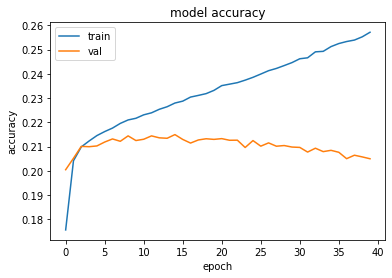

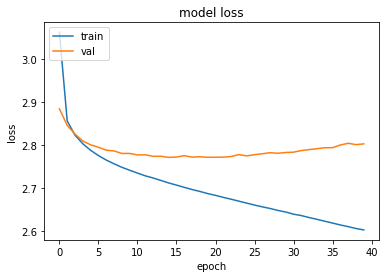

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 1-3 LightGBM

In [ ]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

In [ ]:
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train, average='weighted'))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='weighted'))

***RESULTS ON TRAIN SET***
f1_score:  0.23285208443062683
--
***RESULTS ON TEST SET***
f1_score:  0.16851152886265947
